In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the file using the pandas library
winequality = pd.read_csv(r'D:\Linear Regression\Support Vector\winequality-red.csv')

In [4]:
#View the head of the dataset
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Check the descriptive statistics of wine quality
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Check what columns contains null, if any
winequality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#So as it turns out, this dataset does not contain any null values

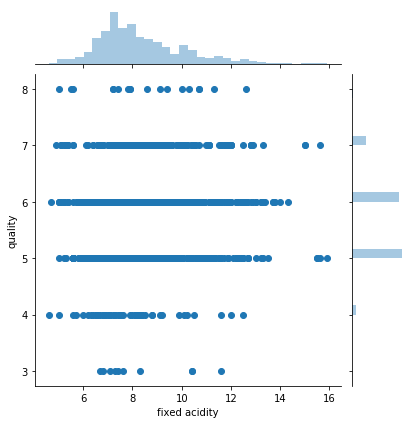

In [8]:
#Making a joint plot to see the relationship between Fixed Acidity and Wine Quality
sns.jointplot(x = 'fixed acidity', y = 'quality', data = winequality)

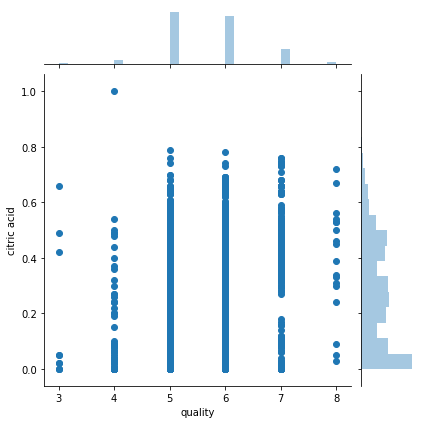

In [9]:
#Making a joint plot to see the relationship between citric acid and wine quality
sns.jointplot(x = 'quality', y = 'citric acid', data = winequality)

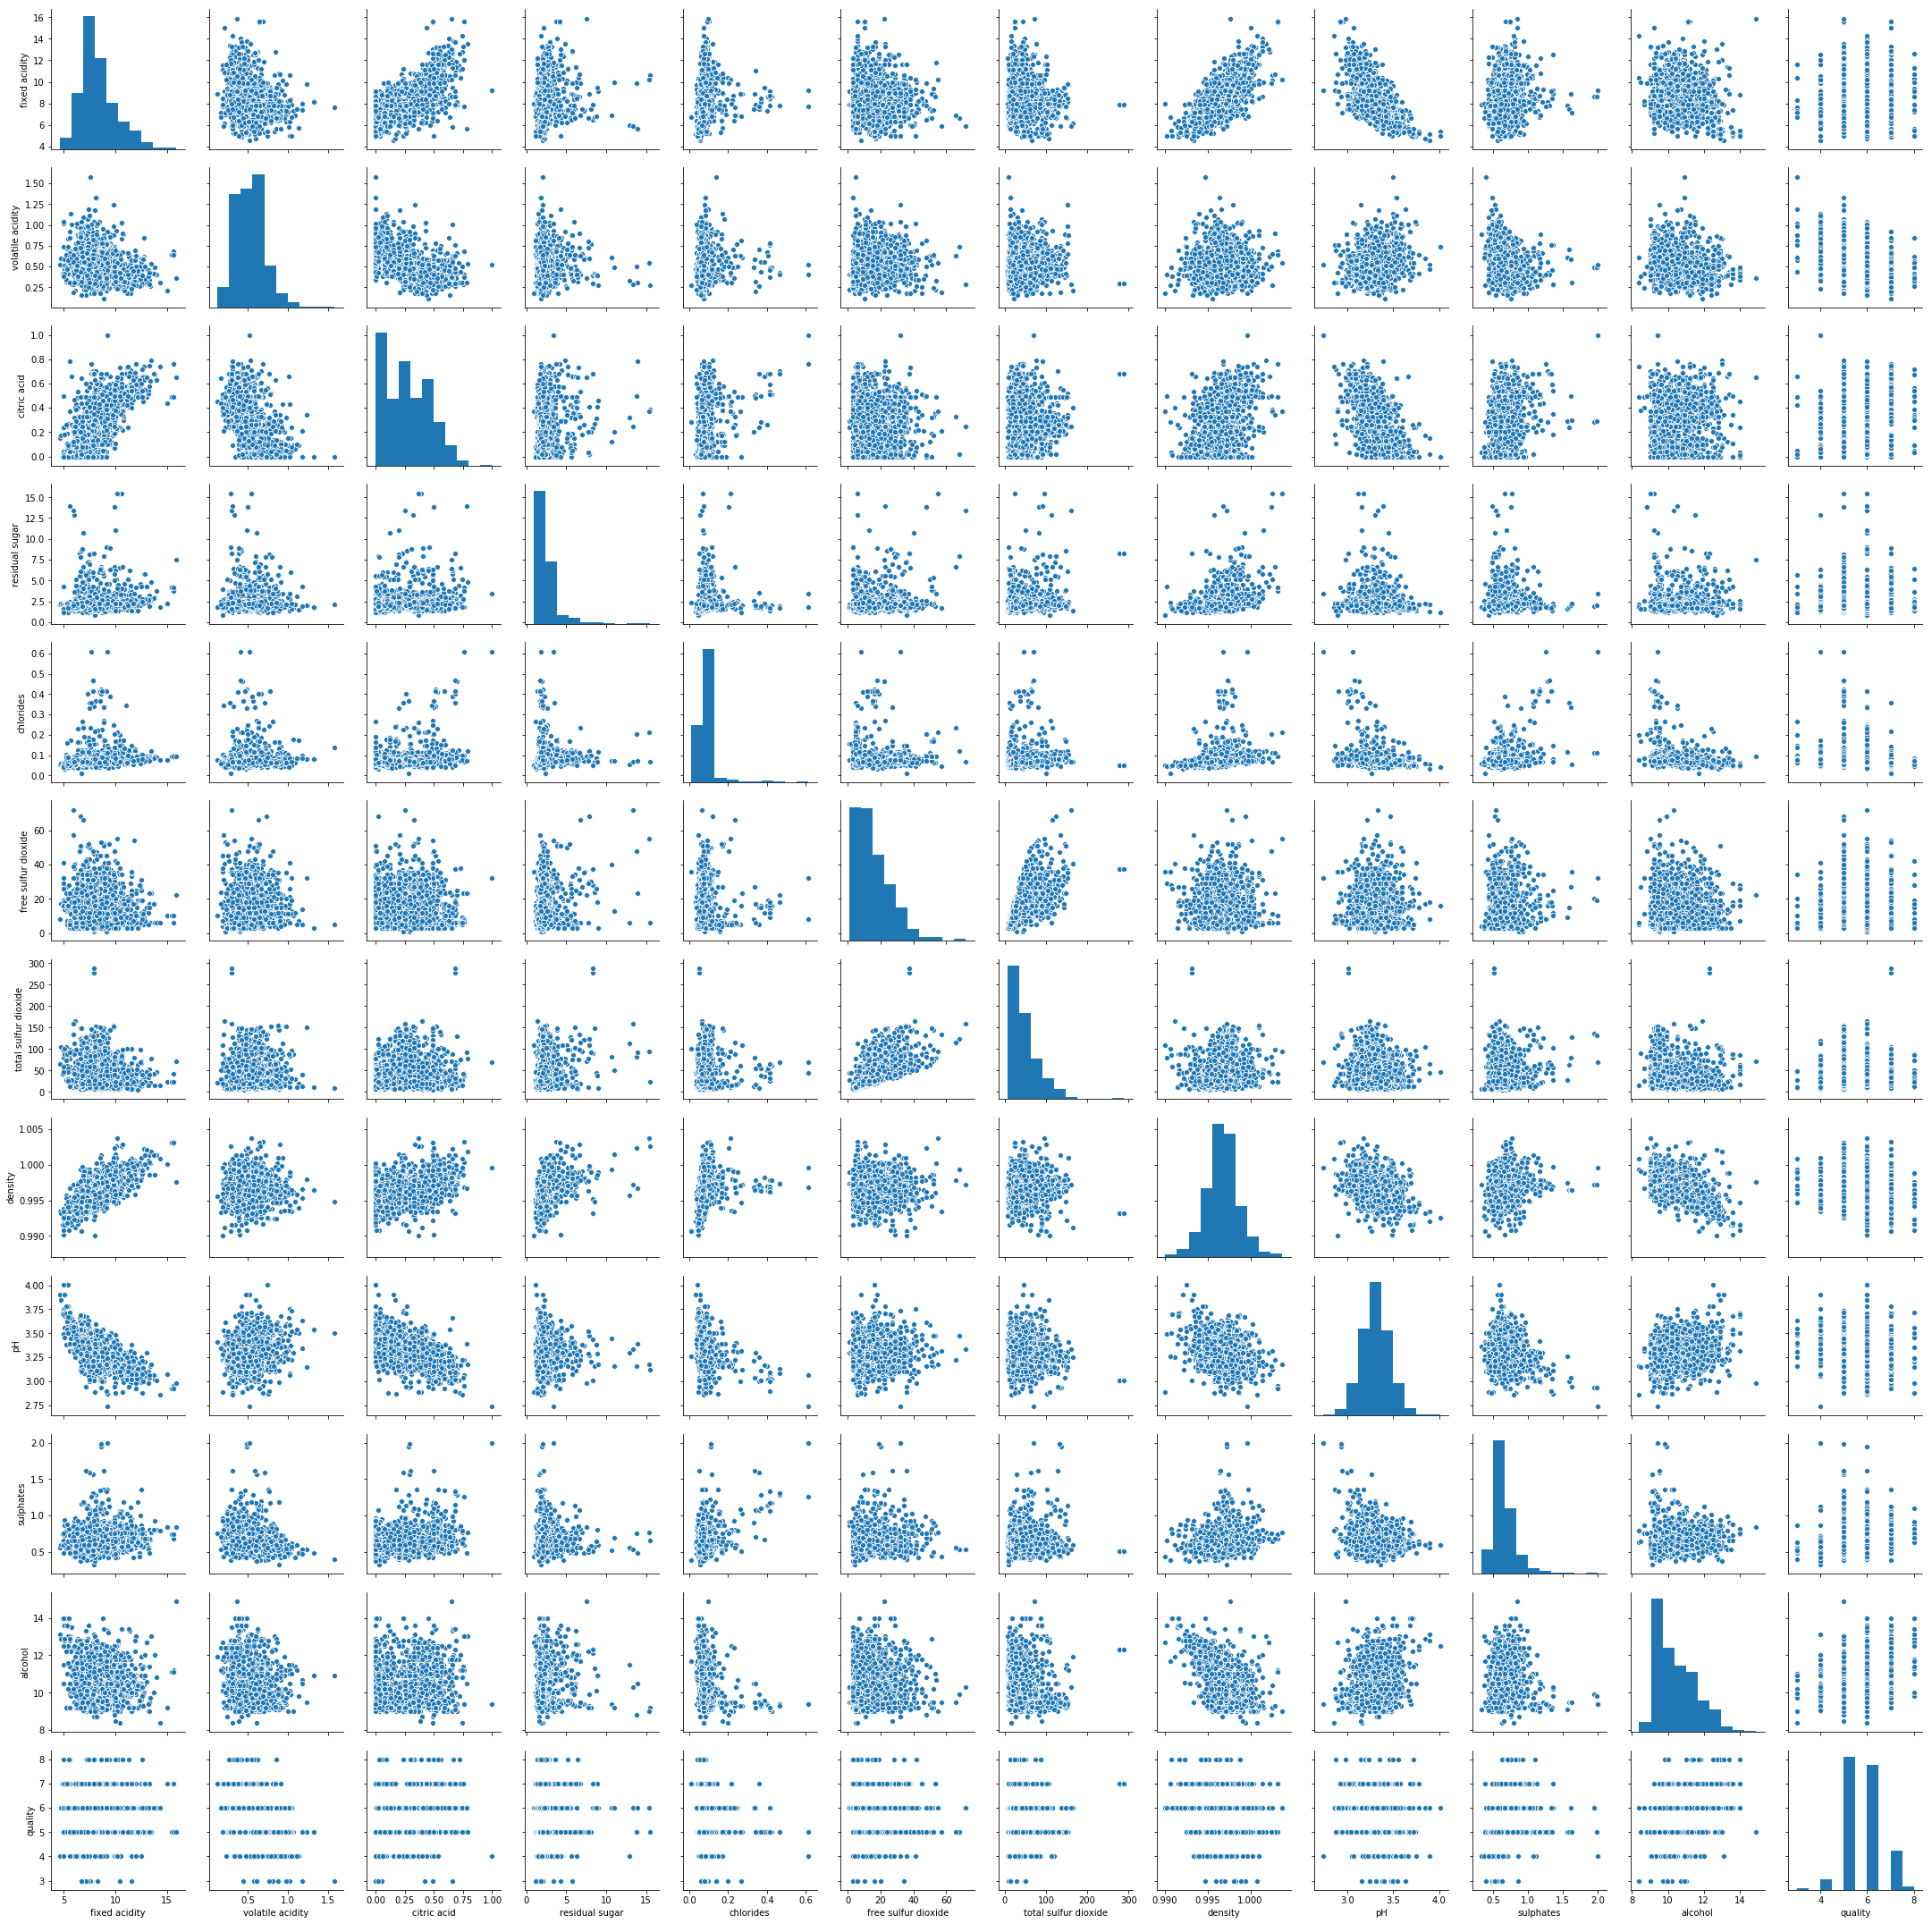

In [10]:
#Visualize correlation among the different variables
sns.pairplot(winequality)

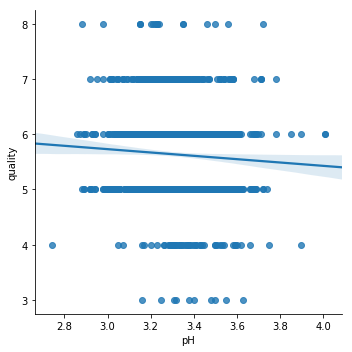

In [11]:
#lmplot on pH and Quality of wine
sns.lmplot(x='pH', y='quality', data = winequality)

In [12]:
#Split into predictor and predicted columns from dataset using pandas
X = winequality[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = winequality[['quality']]

In [13]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_imputed_train = sc_X.fit_transform(X_train)
X_imputed_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_imputed_train = sc_y.fit_transform(y_train)
y_imputed_test = sc_y.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [15]:
#scikit-learn drops the column headers so adding them back
X_imputed_train = pd.DataFrame(X_imputed_train, columns = X_train.columns)
X_imputed_test = pd.DataFrame(X_imputed_test, columns = X_test.columns)
y_imputed_train = pd.DataFrame(y_imputed_train, columns = y_train.columns)
y_imputed_test = pd.DataFrame(y_imputed_test, columns = y_test.columns)

In [16]:
#Import linear regression function 
from sklearn.svm import SVR

In [17]:
#Specifying a variable to Support Vector Regression
regressor = SVR(kernel = 'rbf')

In [18]:
#Creating model using training set
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
#Predict test set
predict = regressor.predict(X_test)

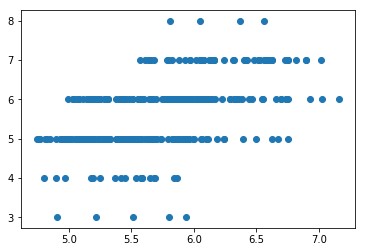

In [20]:
#Scatter plot to visualize predictions 
plt.scatter(predict,y_test)

In [21]:
#Importing metrics to see Mean Absolute Error of prediction
from sklearn import metrics

In [22]:
#Predicting MSE
metrics.mean_absolute_error(y_test,predict)

0.5326682627642788

In [24]:
#R2 of our results
metrics.explained_variance_score(y_test,predict)

0.2854514385257011